# Unlocking the Game: Predictive Power and Player Potential with Machine Learning on FIFA Data
## An In-Depth Machine Learning Journey Through 17,000+ Footballers — Exploring Performance, Value, and Future Stars Using SoFIFA’s Comprehensive Dataset

## import Dependences

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm.auto import tqdm
from datetime import datetime
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay ,classification_report

## Read The Dataset

In [3]:
data_csv = "/kaggle/input/football-players-data/fifa_players.csv"

In [4]:
data = pd.read_csv(data_csv)

In [5]:
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [6]:
data.shape

(17954, 51)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [8]:
data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [9]:
len(data.columns)

51

In [10]:
data.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


## Data Cleaning

In [11]:
data.count()

name                             17954
full_name                        17954
birth_date                       17954
age                              17954
height_cm                        17954
weight_kgs                       17954
positions                        17954
nationality                      17954
overall_rating                   17954
potential                        17954
value_euro                       17699
wage_euro                        17708
preferred_foot                   17954
international_reputation(1-5)    17954
weak_foot(1-5)                   17954
skill_moves(1-5)                 17954
body_type                        17954
release_clause_euro              16117
national_team                      857
national_rating                    857
national_team_position             857
national_jersey_number             857
crossing                         17954
finishing                        17954
heading_accuracy                 17954
short_passing            

In [12]:
DataNulls = dict(data.isna().sum())
DataNulls

{'name': 0,
 'full_name': 0,
 'birth_date': 0,
 'age': 0,
 'height_cm': 0,
 'weight_kgs': 0,
 'positions': 0,
 'nationality': 0,
 'overall_rating': 0,
 'potential': 0,
 'value_euro': 255,
 'wage_euro': 246,
 'preferred_foot': 0,
 'international_reputation(1-5)': 0,
 'weak_foot(1-5)': 0,
 'skill_moves(1-5)': 0,
 'body_type': 0,
 'release_clause_euro': 1837,
 'national_team': 17097,
 'national_rating': 17097,
 'national_team_position': 17097,
 'national_jersey_number': 17097,
 'crossing': 0,
 'finishing': 0,
 'heading_accuracy': 0,
 'short_passing': 0,
 'volleys': 0,
 'dribbling': 0,
 'curve': 0,
 'freekick_accuracy': 0,
 'long_passing': 0,
 'ball_control': 0,
 'acceleration': 0,
 'sprint_speed': 0,
 'agility': 0,
 'reactions': 0,
 'balance': 0,
 'shot_power': 0,
 'jumping': 0,
 'stamina': 0,
 'strength': 0,
 'long_shots': 0,
 'aggression': 0,
 'interceptions': 0,
 'positioning': 0,
 'vision': 0,
 'penalties': 0,
 'composure': 0,
 'marking': 0,
 'standing_tackle': 0,
 'sliding_tackle': 0

In [13]:
Dataduplicated = data.duplicated().sum()
Dataduplicated

0

In [14]:
numerical_columns = ['release_clause_euro']


for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

In [15]:
data.count()

name                             17954
full_name                        17954
birth_date                       17954
age                              17954
height_cm                        17954
weight_kgs                       17954
positions                        17954
nationality                      17954
overall_rating                   17954
potential                        17954
value_euro                       17699
wage_euro                        17708
preferred_foot                   17954
international_reputation(1-5)    17954
weak_foot(1-5)                   17954
skill_moves(1-5)                 17954
body_type                        17954
release_clause_euro              17954
national_team                      857
national_rating                    857
national_team_position             857
national_jersey_number             857
crossing                         17954
finishing                        17954
heading_accuracy                 17954
short_passing            

In [16]:
DataNulls = data.isna().sum()
DataNulls

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro                  0
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [17]:
data.drop(['national_team'],axis=1,inplace=True)
data.drop(['national_rating'],axis=1,inplace=True)
data.drop(['national_team_position'],axis=1,inplace=True)
data.drop(['national_jersey_number'],axis=1,inplace=True)

In [18]:
data.count()

name                             17954
full_name                        17954
birth_date                       17954
age                              17954
height_cm                        17954
weight_kgs                       17954
positions                        17954
nationality                      17954
overall_rating                   17954
potential                        17954
value_euro                       17699
wage_euro                        17708
preferred_foot                   17954
international_reputation(1-5)    17954
weak_foot(1-5)                   17954
skill_moves(1-5)                 17954
body_type                        17954
release_clause_euro              17954
crossing                         17954
finishing                        17954
heading_accuracy                 17954
short_passing                    17954
volleys                          17954
dribbling                        17954
curve                            17954
freekick_accuracy        

In [19]:
data.dropna(inplace=True)

In [20]:
DataNulls = dict(data.isna().sum())
DataNulls

{'name': 0,
 'full_name': 0,
 'birth_date': 0,
 'age': 0,
 'height_cm': 0,
 'weight_kgs': 0,
 'positions': 0,
 'nationality': 0,
 'overall_rating': 0,
 'potential': 0,
 'value_euro': 0,
 'wage_euro': 0,
 'preferred_foot': 0,
 'international_reputation(1-5)': 0,
 'weak_foot(1-5)': 0,
 'skill_moves(1-5)': 0,
 'body_type': 0,
 'release_clause_euro': 0,
 'crossing': 0,
 'finishing': 0,
 'heading_accuracy': 0,
 'short_passing': 0,
 'volleys': 0,
 'dribbling': 0,
 'curve': 0,
 'freekick_accuracy': 0,
 'long_passing': 0,
 'ball_control': 0,
 'acceleration': 0,
 'sprint_speed': 0,
 'agility': 0,
 'reactions': 0,
 'balance': 0,
 'shot_power': 0,
 'jumping': 0,
 'stamina': 0,
 'strength': 0,
 'long_shots': 0,
 'aggression': 0,
 'interceptions': 0,
 'positioning': 0,
 'vision': 0,
 'penalties': 0,
 'composure': 0,
 'marking': 0,
 'standing_tackle': 0,
 'sliding_tackle': 0}

In [21]:
data.count()

name                             17699
full_name                        17699
birth_date                       17699
age                              17699
height_cm                        17699
weight_kgs                       17699
positions                        17699
nationality                      17699
overall_rating                   17699
potential                        17699
value_euro                       17699
wage_euro                        17699
preferred_foot                   17699
international_reputation(1-5)    17699
weak_foot(1-5)                   17699
skill_moves(1-5)                 17699
body_type                        17699
release_clause_euro              17699
crossing                         17699
finishing                        17699
heading_accuracy                 17699
short_passing                    17699
volleys                          17699
dribbling                        17699
curve                            17699
freekick_accuracy        

In [22]:
data.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,7/8/1991,27,193.04,92.1,CB,Netherlands,88,90,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,"RW,ST,RM",France,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,6/2/1988,30,172.72,69.9,ST,Argentina,89,89,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,Manuel Neuer,3/27/1986,32,193.04,92.1,GK,Germany,89,89,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,2/14/1987,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39


In [23]:
data.shape

(17699, 47)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17699 non-null  object 
 1   full_name                      17699 non-null  object 
 2   birth_date                     17699 non-null  object 
 3   age                            17699 non-null  int64  
 4   height_cm                      17699 non-null  float64
 5   weight_kgs                     17699 non-null  float64
 6   positions                      17699 non-null  object 
 7   nationality                    17699 non-null  object 
 8   overall_rating                 17699 non-null  int64  
 9   potential                      17699 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17699 non-null  float64
 12  preferred_foot                 17699 non-null  obje

## Data Preprocessing

In [25]:
data['birth_date'] = pd.to_datetime(data['birth_date'])

data['year'] = data['birth_date'].dt.year
data['month'] = data['birth_date'].dt.month
data['day'] = data['birth_date'].dt.day
data = data.drop('birth_date', axis=1)

In [26]:
data.head(10)

,name,full_name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,year,month,day
0,L. Messi,Lionel Andrés Messi Cuccittini,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,...,94,94,75,96,33,28,26,1987,6,24
1,C. Eriksen,Christian Dannemann Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,...,84,91,67,88,59,57,22,1992,2,14
2,P. Pogba,Paul Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,...,82,88,82,87,63,67,67,1993,3,15
3,L. Insigne,Lorenzo Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,...,83,87,61,83,51,24,22,1991,6,4
4,K. Koulibaly,Kalidou Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,...,24,49,33,80,91,88,87,1991,6,20
5,V. van Dijk,Virgil van Dijk,27,193.04,92.1,CB,Netherlands,88,90,59500000.0,...,41,60,62,87,90,89,84,1991,7,8
6,K. Mbappé,Kylian Mbappé,20,152.40,73.0,"RW,ST,RM",France,88,95,81000000.0,...,88,82,70,86,34,34,32,1998,12,20
7,S. Agüero,Sergio Leonel Agüero del Castillo,30,172.72,69.9,ST,Argentina,89,89,64500000.0,...,92,83,83,90,30,20,12,1988,6,2
8,M. Neuer,Manuel Neuer,32,193.04,92.1,GK,Germany,89,89,38000000.0,...,12,70,47,70,17,10,11,1986,3,27
9,E. Cavani,Edinson Roberto Cavani Gómez,32,185.42,77.1,ST,Uruguay,89,89,60000000.0,...,93,77,85,82,52,45,39,1987,2,14


In [27]:
data['positions'].unique()

array(['CF,RW,ST', 'CAM,RM,CM', 'CM,CAM', 'LW,ST', 'CB', 'RW,ST,RM', 'ST',
       'GK', 'CDM,CM', 'CF,ST', 'RW,ST', 'CAM,RW', 'CDM', 'CM,CDM', 'LB',
       'CM,CAM,CDM', 'CAM,CM,LW', 'CAM,CM,RM', 'LW,ST,LM', 'CAM,CM',
       'CAM', 'LW,RW', 'RW,LW', 'CM,LM', 'CM', 'RM,RW', 'LM,RM,CAM,LW',
       'LM', 'RW,RM', 'LM,ST,RM', 'RB', 'LM,RM,LW,RW', 'LM,CAM,RM',
       'RM,LM,ST', 'RW', 'LM,ST,RM,LW', 'CM,CDM,CAM', 'CM,CDM,CB',
       'CB,CDM', 'CF,ST,CAM', 'CDM,CB', 'RB,RWB', 'RM', 'LM,CAM', 'CM,LW',
       'LB,LWB,LM', 'ST,LW', 'LM,LB,CM', 'RB,RM', 'RM,LM,CM', 'LM,RM,CAM',
       'RM,RW,ST', 'LW,LM,RW', 'LB,LM', 'ST,LW,LM', 'RM,CM', 'CM,RM',
       'CB,RB', 'RM,RW,LM', 'LM,RM', 'CDM,CB,CM', 'CAM,CDM', 'LB,CDM',
       'CAM,RM,LM', 'RM,CAM,CM', 'LWB', 'CDM,CM,LM', 'CDM,CM,RM',
       'CDM,CM,CB', 'CAM,LW', 'RM,LM', 'ST,CAM', 'LM,CM', 'ST,CF,CAM,LM',
       'LWB,LB,CB,LM', 'RB,LB', 'LW', 'CAM,ST', 'LM,RM,LW', 'LWB,LM,LB',
       'ST,CF,LM,CAM', 'LM,LW,ST', 'LB,LWB', 'RWB,RB,RM', 'ST,RW',
    

In [28]:
len(data['positions'].unique())

884

In [29]:
data['main_positions'] = data['positions'].str.split(',').str[0]
data['sub_positions'] = data['positions'].str.split(',').str[1]
data['sub_positions1'] = data['positions'].str.split(',').str[2]
data['sub_positions2'] = data['positions'].str.split(',').str[3]
data.drop('positions', axis=1, inplace=True)

In [30]:
data['first_name'] = data['full_name'].str.split(' ').str[0]
data['second_name'] = data['full_name'].str.split(' ').str[1]
data['last_name'] = data['full_name'].str.split(' ').str[2]
data.drop('full_name', axis=1, inplace=True)

In [31]:
categorical_columns = ['sub_positions', 'sub_positions1', 'sub_positions2','first_name',
                       'second_name','last_name']
for col in categorical_columns:
    data[col].fillna("nothing", inplace=True)

In [32]:
data.head()

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,year,month,day,main_positions,sub_positions,sub_positions1,sub_positions2,first_name,second_name,last_name
0,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,Left,...,1987,6,24,CF,RW,ST,nothing,Lionel,Andrés,Messi
1,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,Right,...,1992,2,14,CAM,RM,CM,nothing,Christian,,Dannemann
2,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,Right,...,1993,3,15,CM,CAM,nothing,nothing,Paul,Pogba,nothing
3,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,Right,...,1991,6,4,LW,ST,nothing,nothing,Lorenzo,Insigne,nothing
4,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,Right,...,1991,6,20,CB,nothing,nothing,nothing,Kalidou,Koulibaly,nothing


In [33]:
data['main_positions'].unique()

array(['CF', 'CAM', 'CM', 'LW', 'CB', 'RW', 'ST', 'GK', 'CDM', 'LB', 'RM',
       'LM', 'RB', 'LWB', 'RWB'], dtype=object)

In [34]:
mapping = {
    'GK': 'goalkeeper',
    'RB': 'defender', 'LB': 'defender', 'CB': 'defender','RWB': 'defender', 'LWB': 'defender', 
    'CAM': 'Midfielder', 'CM':'Midfielder','LM':'Midfielder','RM':'Midfielder','CDM':'Midfielder',
    'CF': 'striker','LW':'striker','RW':'striker','ST':'striker'
}
data['positions'] = data['main_positions'].map(mapping)

In [35]:
data['sub_positions'].unique()

array(['RW', 'RM', 'CAM', 'ST', 'nothing', 'CM', 'CDM', 'LW', 'LM', 'CB',
       'RWB', 'LWB', 'LB', 'RB', 'CF'], dtype=object)

In [36]:
data['sub_positions1'].unique()

array(['ST', 'CM', 'nothing', 'RM', 'CDM', 'LW', 'LM', 'CAM', 'CB', 'RW',
       'LB', 'RWB', 'RB', 'CF', 'LWB'], dtype=object)

In [37]:
data['sub_positions2'].unique()

array(['nothing', 'LW', 'RW', 'LM', 'CAM', 'CF', 'CDM', 'RWB', 'RM', 'CM',
       'LB', 'ST', 'RB', 'CB', 'LWB'], dtype=object)

In [38]:
data.count()

name                             17699
age                              17699
height_cm                        17699
weight_kgs                       17699
nationality                      17699
overall_rating                   17699
potential                        17699
value_euro                       17699
wage_euro                        17699
preferred_foot                   17699
international_reputation(1-5)    17699
weak_foot(1-5)                   17699
skill_moves(1-5)                 17699
body_type                        17699
release_clause_euro              17699
crossing                         17699
finishing                        17699
heading_accuracy                 17699
short_passing                    17699
volleys                          17699
dribbling                        17699
curve                            17699
freekick_accuracy                17699
long_passing                     17699
ball_control                     17699
acceleration             

## Data Visualization

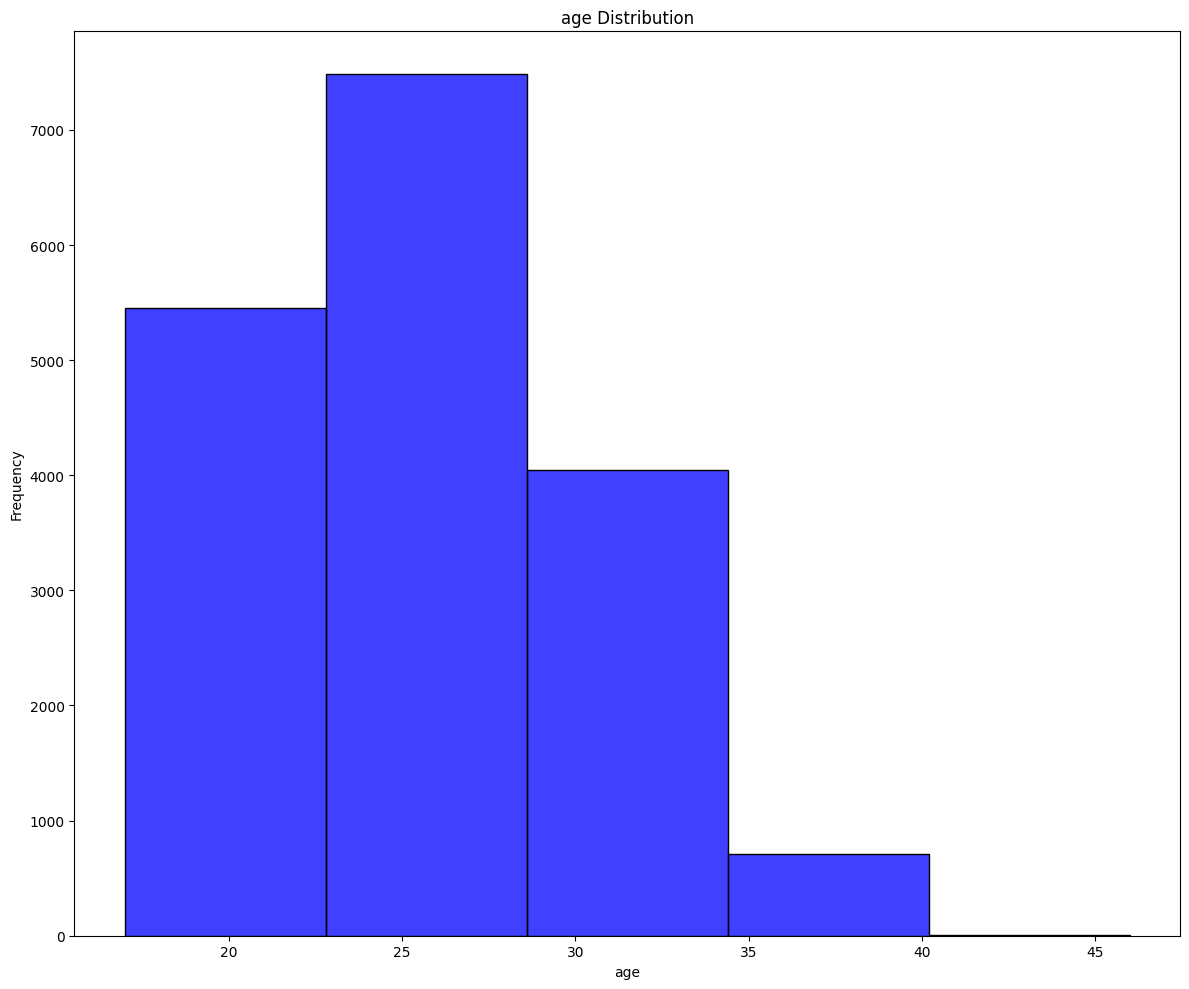

In [39]:
numeric_columns = ['age']
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 1, i)  
    sns.histplot(data[col], kde=False, color="blue", bins=5)  
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
bins = [1.000000e+04, 5.000000e+05,1.000000e+06,5.000000e+06,1.000000e+07,
        2.000000e+07,3.000000e+07,5.000000e+07,1.000000e+08,1.105000e+08, float('inf')]
labels = ['min (10K)','500K','1M', '5M','10M','20M','30M','50M','100M', 'max (110.5M)']
price_range_data = pd.cut(data['value_euro'], bins=bins, labels=labels).reset_index()
price_range_data.head(5)
price_range_counts = price_range_data['value_euro'].value_counts().reset_index()
price_range_counts.columns = ['value_euro', 'count']


fig = px.pie(price_range_counts, values='count', names='value_euro', hole=0.3,
             labels={'value_euro': 'value_euro Range'},
             title='Distribution of Players by value Range')
fig.show()

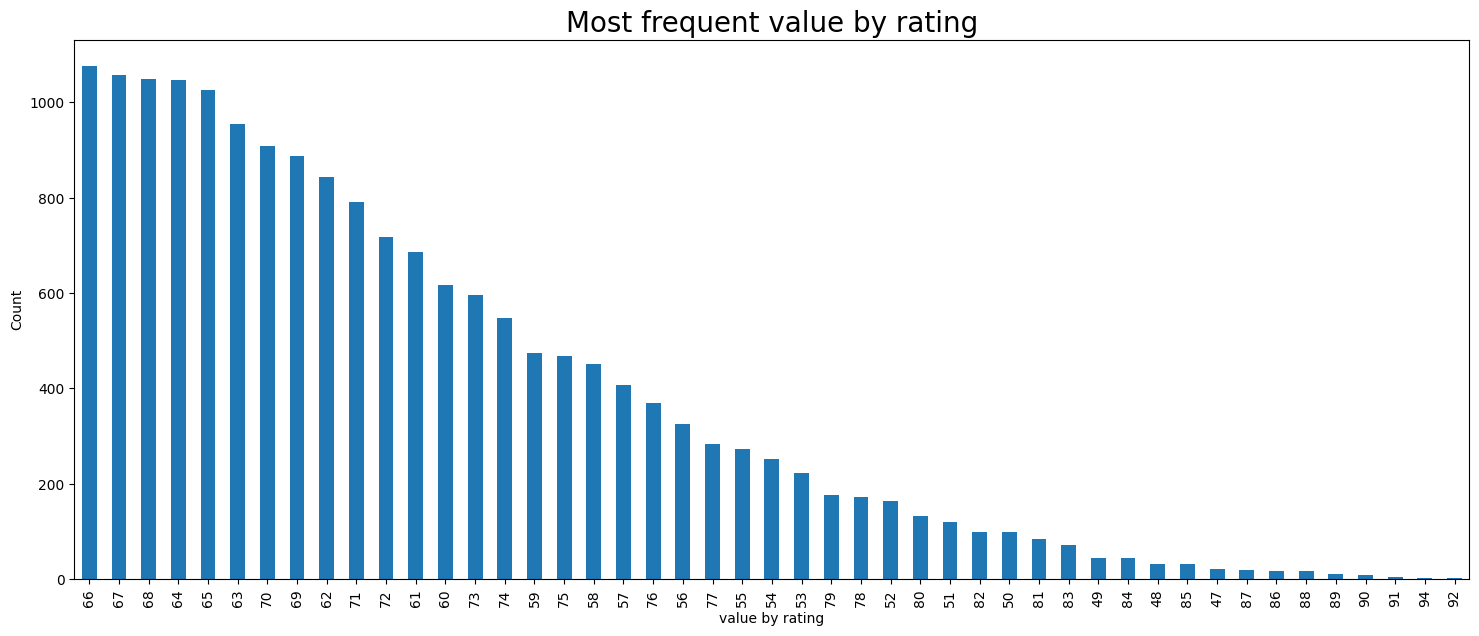

In [41]:
data['overall_rating'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Most frequent value by rating',fontsize = 20)
plt.xlabel('value by rating')
plt.ylabel('Count')
plt.show()

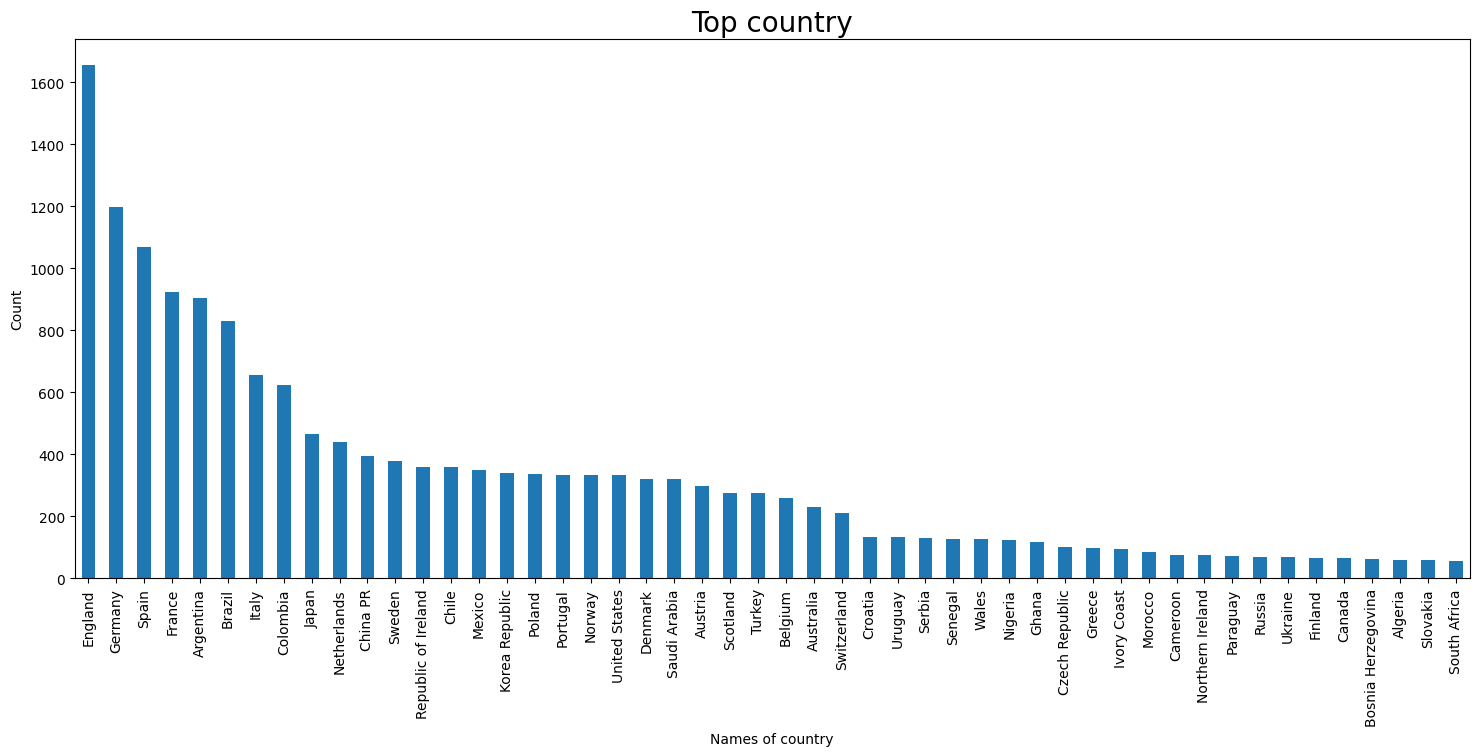

In [42]:
data['nationality'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top country',fontsize = 20)
plt.xlabel('Names of country')
plt.ylabel('Count')
plt.show()

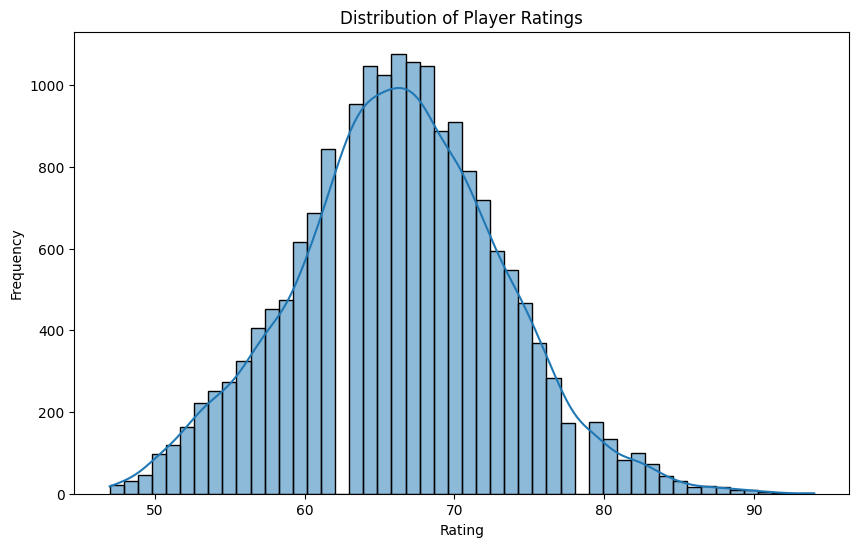

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data['overall_rating'], bins=50, kde = True)
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

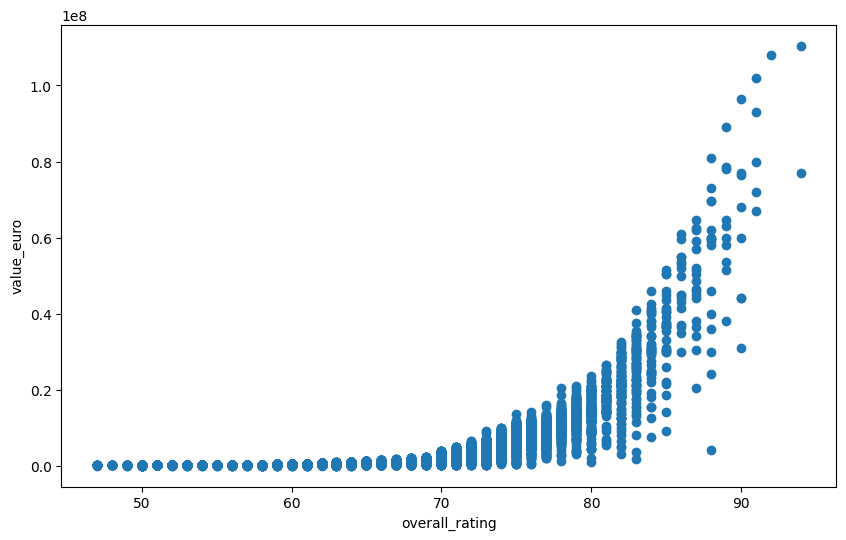

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['overall_rating'], data['value_euro'])
ax.set_xlabel('overall_rating')
ax.set_ylabel('value_euro')
plt.show()

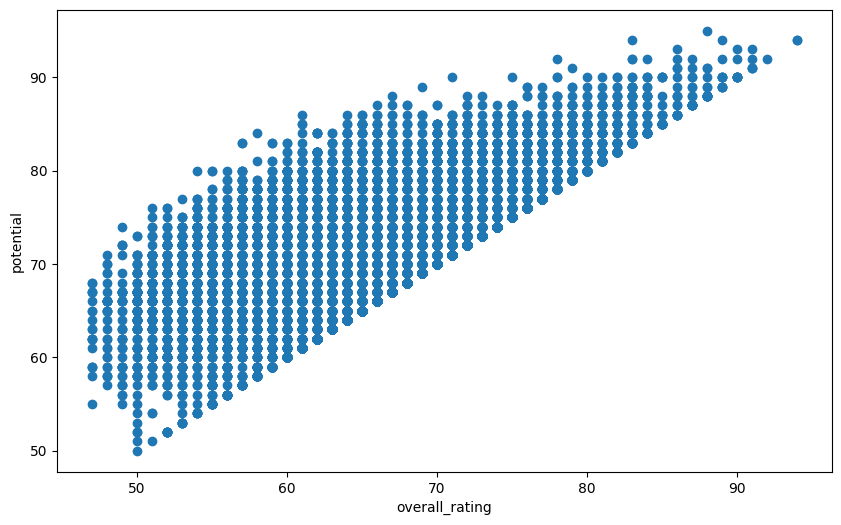

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['overall_rating'], data['potential'])
ax.set_xlabel('overall_rating')
ax.set_ylabel('potential')
plt.show()

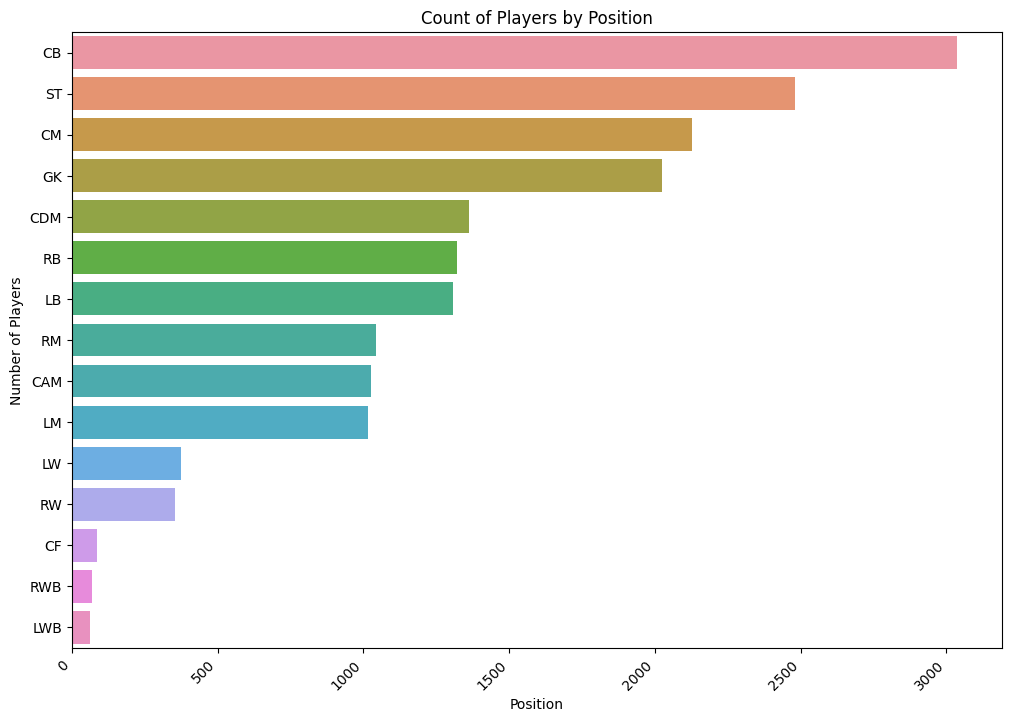

In [46]:
position_counts = data['main_positions'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=position_counts.values, y=position_counts.index)
plt.title('Count of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.show()

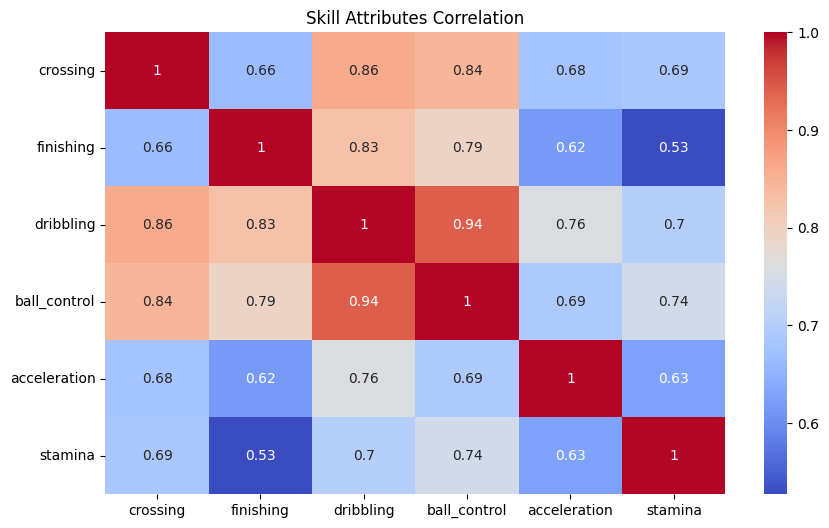

In [47]:
skill_columns = ['crossing', 'finishing', 'dribbling', 'ball_control', 'acceleration', 'stamina']
plt.figure(figsize=(10, 6))
sns.heatmap(data[skill_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Skill Attributes Correlation')
plt.show()

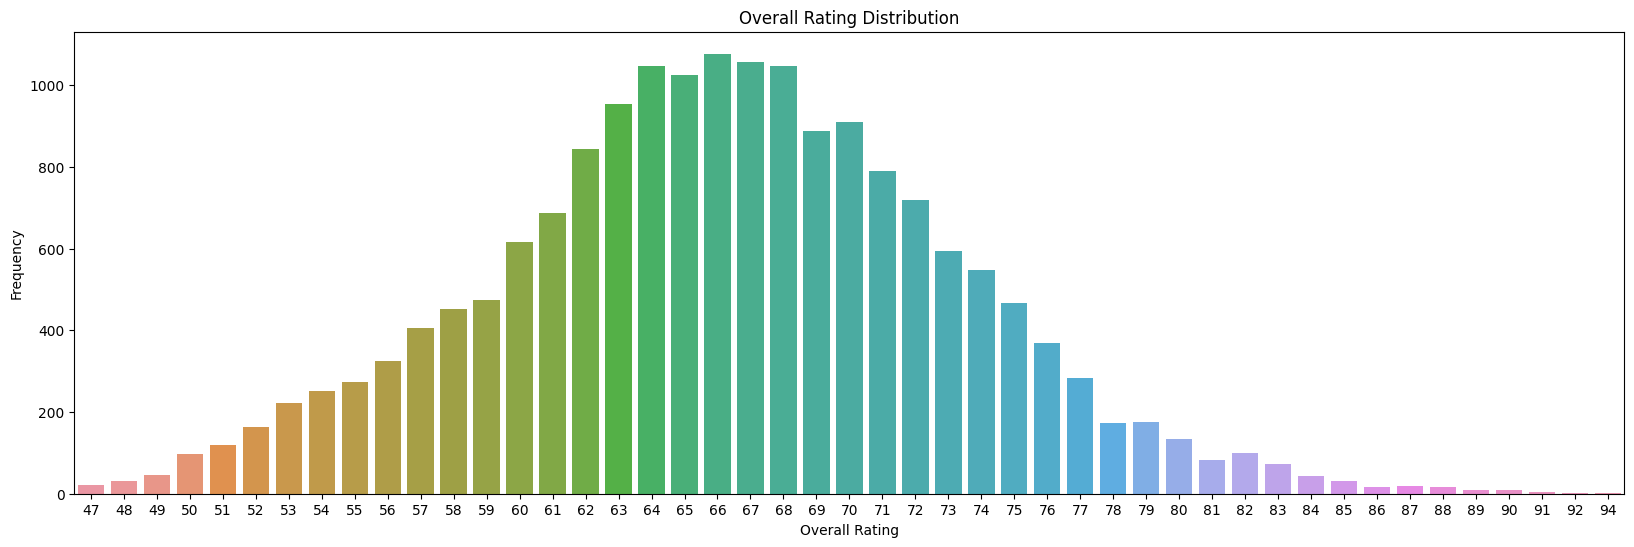

In [48]:
plt.figure(figsize=(20,6))

sns.countplot(x='overall_rating', data=data)

plt.title('Overall Rating Distribution')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

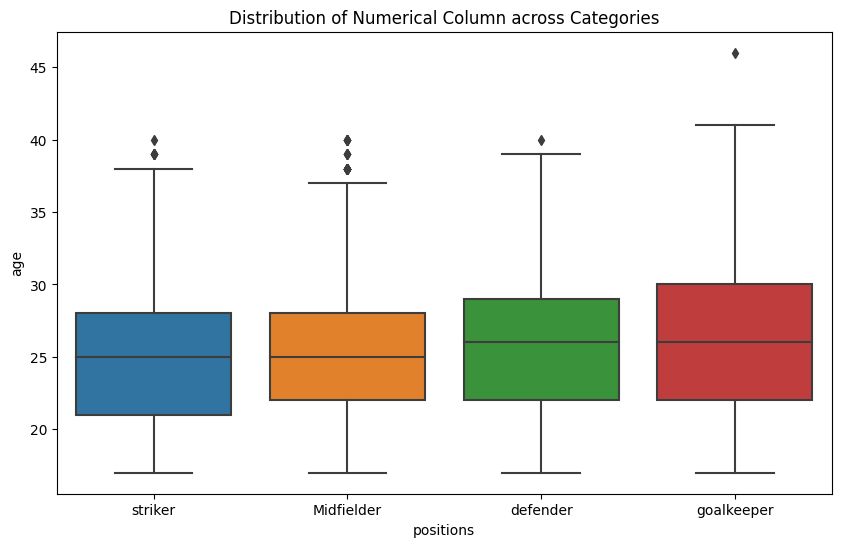

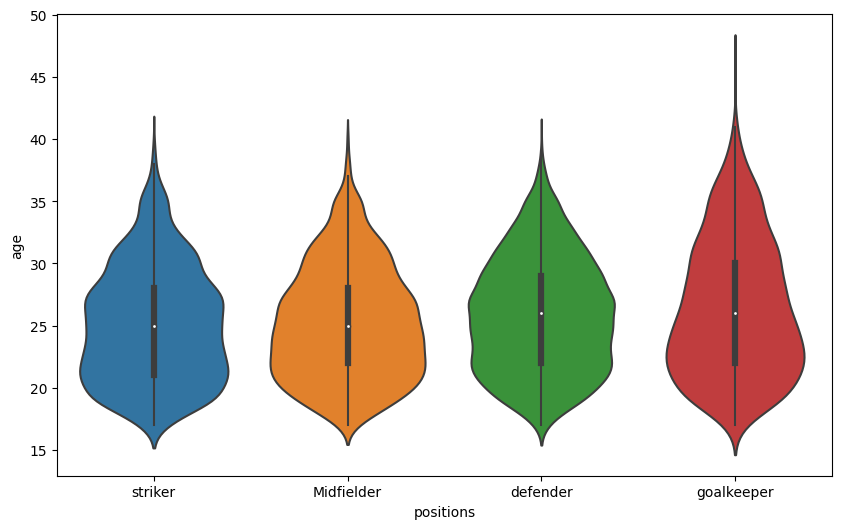

In [49]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='positions', y='age', data=data)
plt.title('Distribution of Numerical Column across Categories')
plt.show()

# Violin plot (shows density)
plt.figure(figsize=(10,6))
sns.violinplot(x='positions', y='age', data=data)
plt.show()

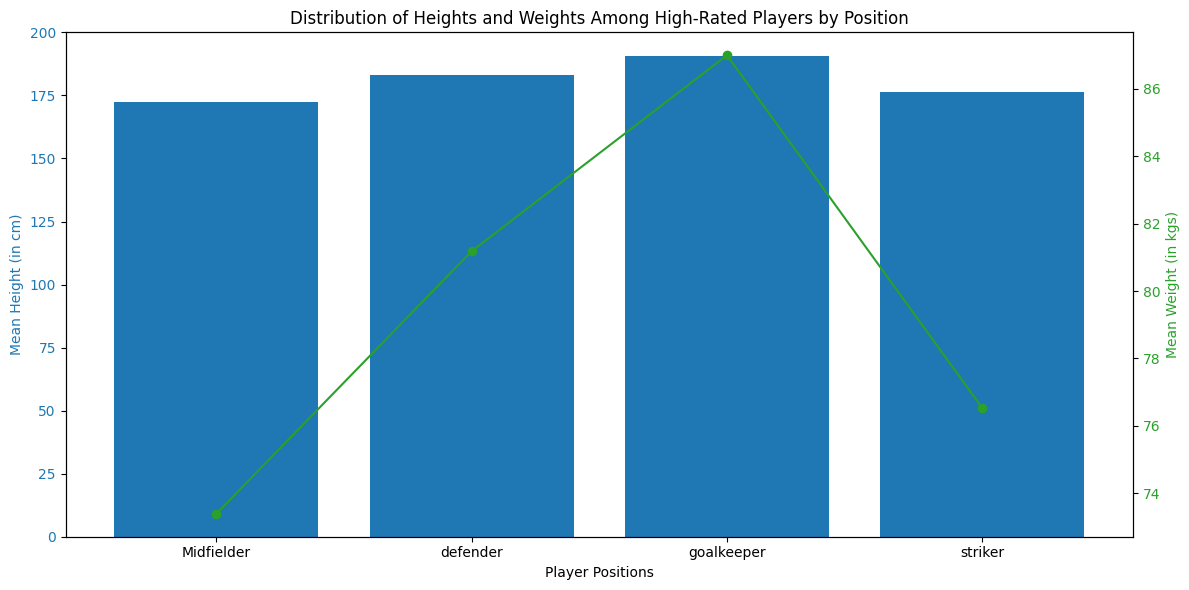

In [50]:
high_rated_players = data[data['overall_rating'] >= 85]


high_rated_position_height_mean = high_rated_players.groupby('positions')['height_cm'].mean()
high_rated_position_weight_mean = high_rated_players.groupby('positions')['weight_kgs'].mean()


fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Player Positions')
ax1.set_ylabel('Mean Height (in cm)', color=color)
ax1.bar(high_rated_position_height_mean.index, high_rated_position_height_mean.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Mean Weight (in kgs)', color=color)
ax2.plot(high_rated_position_weight_mean.index, high_rated_position_weight_mean.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Distribution of Heights and Weights Among High-Rated Players by Position')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

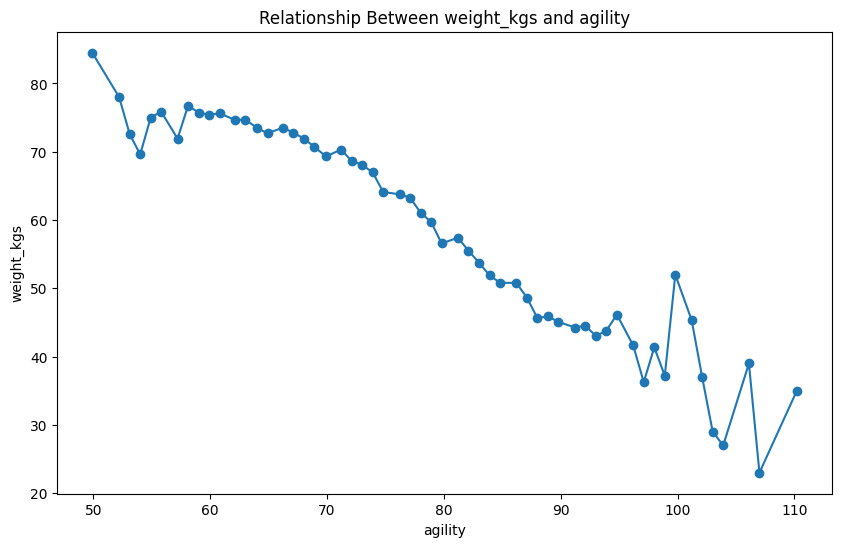

In [51]:
rating_wage_mean = data.groupby('weight_kgs')['agility'].mean()


plt.figure(figsize=(10, 6))
plt.plot(rating_wage_mean.index, rating_wage_mean.values, marker='o')
plt.xlabel('agility')
plt.ylabel('weight_kgs')
plt.title('Relationship Between weight_kgs and agility')
plt.show()

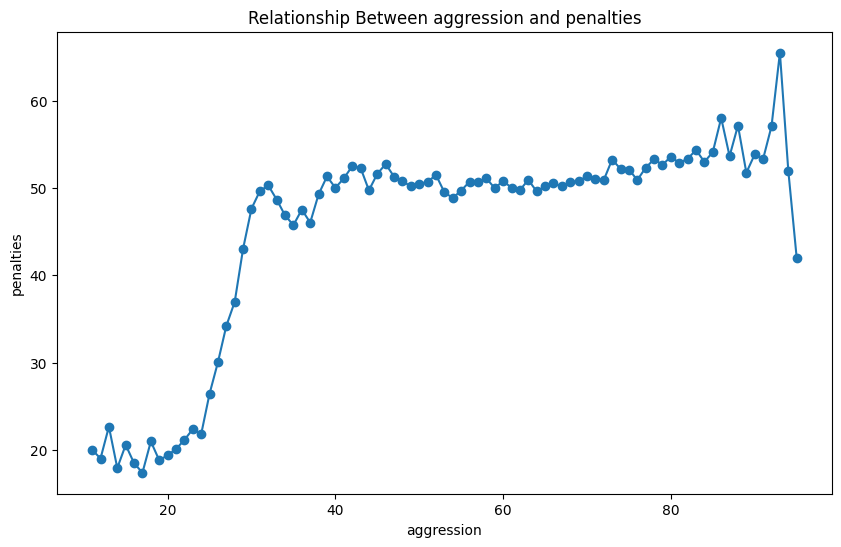

In [52]:
rating_wage_mean = data.groupby('aggression')['penalties'].mean()


plt.figure(figsize=(10, 6))
plt.plot(rating_wage_mean.index, rating_wage_mean.values, marker='o')
plt.xlabel('aggression')
plt.ylabel('penalties')
plt.title('Relationship Between aggression and penalties')
plt.show()

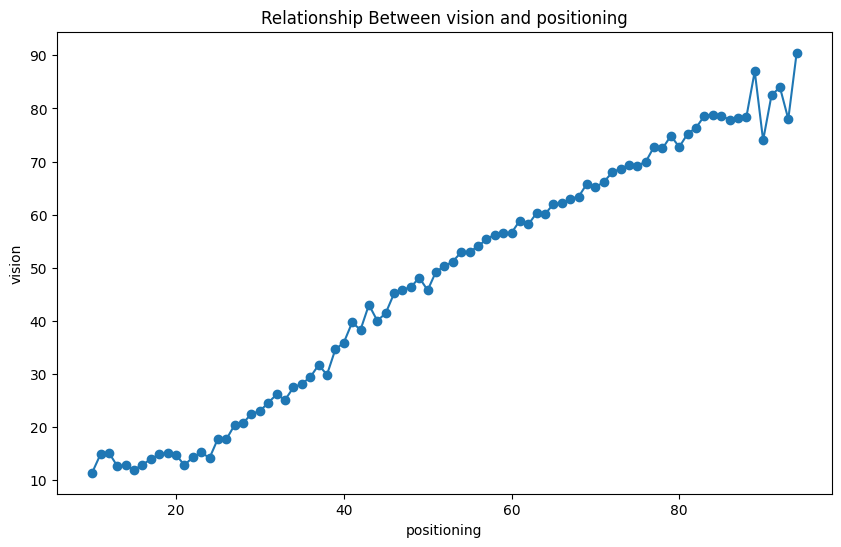

In [53]:
rating_wage_mean = data.groupby('vision')['positioning'].mean()

plt.figure(figsize=(10, 6))
plt.plot(rating_wage_mean.index, rating_wage_mean.values, marker='o')
plt.xlabel('positioning')
plt.ylabel('vision')
plt.title('Relationship Between vision and positioning')
plt.show()

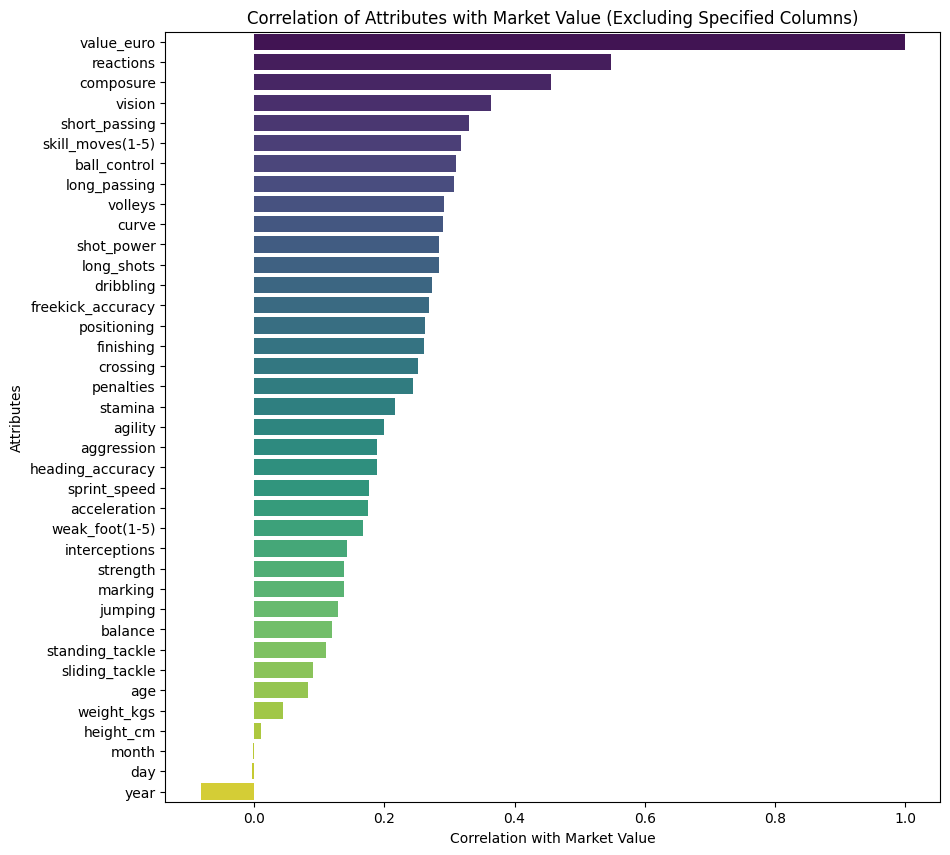

In [54]:
# List of columns to exclude from correlation calculation
exclude_columns = [ 'release_clause_euro', 'wage_euro',
                'international_reputation(1-5)', 'overall_rating', 'potential']

# Calculate correlation between attributes and market value, excluding specified columns
correlation = data.drop(columns=exclude_columns).corr(numeric_only=True)['value_euro'].sort_values(ascending=False)

# Plot the correlation of attributes with market value
plt.figure(figsize=(10, 10))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.xlabel('Correlation with Market Value')
plt.ylabel('Attributes')
plt.title('Correlation of Attributes with Market Value (Excluding Specified Columns)')
plt.show()

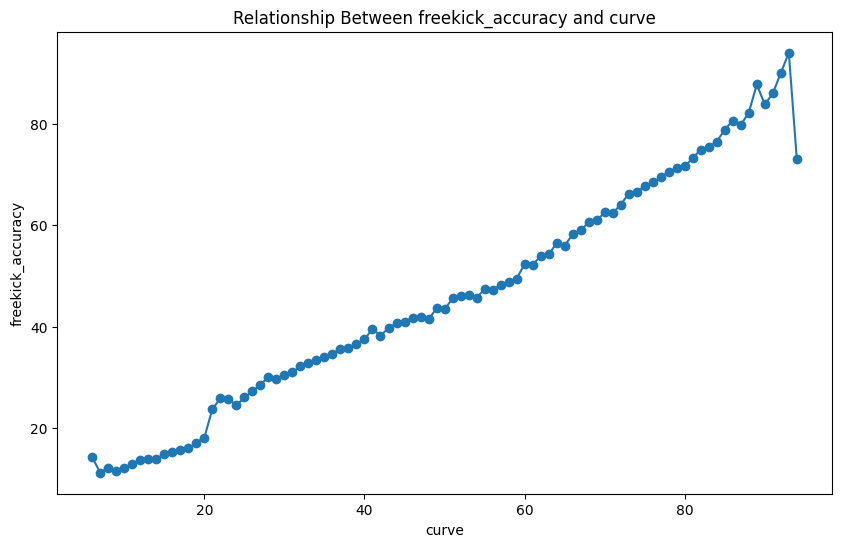

In [55]:
rating_wage_mean = data.groupby('curve')['freekick_accuracy'].mean()

plt.figure(figsize=(10, 6))
plt.plot(rating_wage_mean.index, rating_wage_mean.values, marker='o')
plt.xlabel('curve')
plt.ylabel('freekick_accuracy')
plt.title('Relationship Between freekick_accuracy and curve')
plt.show()

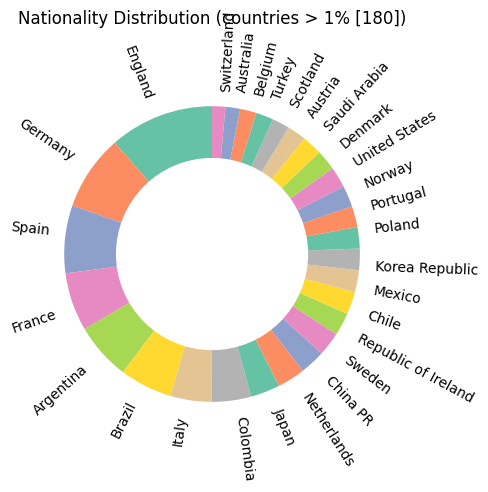

In [56]:
table1 = data['nationality'].value_counts()
table1_filtered = table1[table1 >= 180]
x = table1_filtered
labels = table1_filtered.index.values
colors = sns.color_palette('Set2')

# Plot the pie chart with rotated labels
plt.pie(x=x, labels=labels, colors=colors, startangle=90, rotatelabels=True)

# Add a hole in the pie
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

# Adjust the distance between the title and the chart
plt.title('Nationality Distribution (countries > 1% [180])', y=1.1)
plt.show()

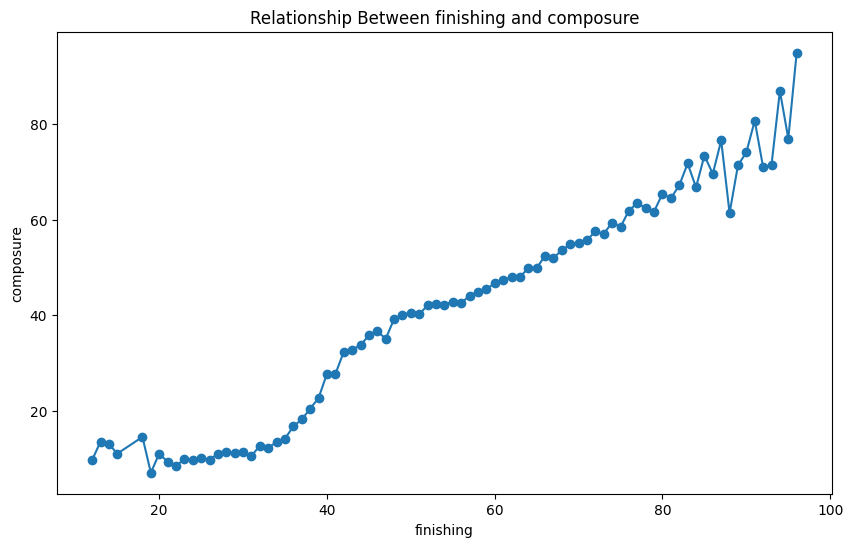

In [57]:
rating_wage_mean = data.groupby('composure')['finishing'].mean()

plt.figure(figsize=(10, 6))
plt.plot(rating_wage_mean.index, rating_wage_mean.values, marker='o')
plt.xlabel('finishing')
plt.ylabel('composure')
plt.title('Relationship Between finishing and composure')
plt.show()

## data preprocessing part 2

In [58]:
lb = LabelEncoder()

In [59]:
lb.fit(data['main_positions'])
data['main_positions'] = lb.transform(data['main_positions'])

In [60]:
lb.fit(data['sub_positions'])
data['sub_positions'] = lb.transform(data['sub_positions'])

In [61]:
lb.fit(data['sub_positions1'])
data['sub_positions1'] = lb.transform(data['sub_positions1'])

In [62]:
lb.fit(data['sub_positions2'])
data['sub_positions2'] = lb.transform(data['sub_positions2'])

In [63]:
lb.fit(data['positions'])
data['positions'] = lb.transform(data['positions'])

In [64]:
data['body_type'].unique()

array(['Messi', 'Lean', 'Normal', 'Stocky', 'Courtois',
       'PLAYER_BODY_TYPE_25', 'Akinfenwa', 'Shaqiri', 'Neymar',
       'C. Ronaldo'], dtype=object)

In [65]:
lb.fit(data['body_type'])
data['body_type'] = lb.transform(data['body_type'])

In [66]:
data['body_type'].unique()

array([4, 3, 6, 9, 2, 7, 0, 8, 5, 1])

In [67]:
data['preferred_foot'].unique()

array(['Left', 'Right'], dtype=object)

In [68]:
lb.fit(data['preferred_foot'])
data['preferred_foot'] = lb.transform(data['preferred_foot'])

In [69]:
data['preferred_foot'].unique()

array([0, 1])

In [70]:
data

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,month,day,main_positions,sub_positions,sub_positions1,sub_positions2,first_name,second_name,last_name,positions
0,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,0,...,6,24,3,11,13,14,Lionel,Andrés,Messi,3
1,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,1,...,2,14,0,10,4,14,Christian,,Dannemann,0
2,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,1,...,3,15,4,0,14,14,Paul,Pogba,nothing,0
3,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,1,...,6,4,8,13,14,14,Lorenzo,Insigne,nothing,3
4,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,1,...,6,20,1,14,14,14,Kalidou,Koulibaly,nothing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,74.8,Scotland,67,70,975000.0,3000.0,1,...,10,7,11,0,4,14,Rory,,McKenzie,0
17950,M. Sipľak,23,182.88,79.8,Slovakia,59,67,190000.0,1000.0,0,...,2,2,6,14,14,14,Michal,Sipľak,nothing,1
17951,J. Bekkema,22,185.42,89.8,Netherlands,59,67,170000.0,1000.0,1,...,4,9,5,14,14,14,Jan,Bekkema,nothing,2
17952,A. Al Yami,21,175.26,64.9,Saudi Arabia,59,71,280000.0,4000.0,1,...,6,19,14,6,14,14,Abdulrahman,Al,Yami,3


In [71]:
data['nationality'].unique()

array(['Argentina', 'Denmark', 'France', 'Italy', 'Senegal',
       'Netherlands', 'Germany', 'Uruguay', 'Spain', 'Belgium', 'Egypt',
       'Slovakia', 'Brazil', 'Croatia', 'Costa Rica', 'Colombia',
       'Morocco', 'Portugal', 'Sweden', 'Bosnia Herzegovina', 'Mexico',
       'England', 'Austria', 'Iceland', 'Hungary', 'Wales', 'Ukraine',
       'Central African Rep.', 'Serbia', 'Ivory Coast', 'Cameroon',
       'Paraguay', 'Australia', 'Algeria', 'Romania', 'Russia', 'Israel',
       'Switzerland', 'Chile', 'Tunisia', 'Turkey', 'Nigeria', 'Peru',
       'Norway', 'Greece', 'United States', 'Venezuela', 'Iran',
       'Equatorial Guinea', 'Cape Verde', 'Tanzania', 'Scotland',
       'China PR', 'Kosovo', 'Montenegro', 'Canada', 'Madagascar', 'Mali',
       'Ghana', 'Guinea', 'Poland', 'Cuba', 'Northern Ireland', 'Japan',
       'New Zealand', 'Republic of Ireland', 'Ecuador', 'Burkina Faso',
       'Czech Republic', 'Slovenia', 'Belarus', 'Gabon', 'FYR Macedonia',
       'Curacao', '

In [72]:
len(data['nationality'].unique())

159

In [73]:
lb.fit(data['nationality'])
data['nationality'] = lb.transform(data['nationality'])

In [74]:
data['nationality'].unique()

array([  6,  39,  53,  75, 125, 103,  57, 151, 132,  13,  42, 128,  18,
        33,  32,  29, 100, 118, 137,  17,  96,  44,   9,  70,  69, 155,
       148,  25, 126,  76,  22, 114,   8,   2, 120, 121,  74, 138,  27,
       145, 146, 107, 115, 109,  59, 150, 153,  72,  45,  24, 141, 124,
        28,  84,  98,  23,  92,  93,  58,  63, 117,  34, 108,  78, 105,
       119,  41,  20,  37, 129,  12,  54,  49,  35,  38,  67, 127,  64,
       123,  51,  83, 157, 139,   7,  56,   4, 130, 158,  31,  46,  73,
         1,  55,  77,  21, 147,  14, 136,  52,  90, 143,  43,  82, 112,
        97,  66,  30,  10, 144,  87,  81,  26,  50,  80,  47,  19,  99,
        40, 142,   3, 135,  68,  94,   0, 152, 111, 156,  91,  95,  71,
        15,  60, 116,  89,  65, 133,   5,  36, 122, 131, 113,  86, 154,
       106,  48,  11,  79, 134,  62, 102,  61,  16, 101,  85,  88, 104,
       110, 140, 149])

In [75]:
lb.fit(data['name'])
data['name'] = lb.transform(data['name'])

In [76]:
lb.fit(data['first_name'])
data['first_name'] = lb.transform(data['first_name'])

In [77]:
lb.fit(data['second_name'])
data['second_name'] = lb.transform(data['second_name'])

In [78]:
lb.fit(data['last_name'])
data['last_name'] = lb.transform(data['last_name'])

In [79]:
data

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,month,day,main_positions,sub_positions,sub_positions1,sub_positions2,first_name,second_name,last_name,positions
0,9393,31,170.18,72.1,6,94,94,110500000.0,565000.0,0,...,6,24,3,11,13,14,2390,407,1786,3
1,2396,27,154.94,76.2,39,88,89,69500000.0,205000.0,1,...,2,14,0,10,4,14,726,0,765,0
2,12848,25,190.50,83.9,53,88,91,73000000.0,255000.0,1,...,3,15,4,0,14,14,3067,8015,2995,0
3,9282,27,162.56,59.0,75,88,88,62000000.0,165000.0,1,...,6,4,8,13,14,14,2402,4674,2995,3
4,8545,27,187.96,88.9,125,88,91,60000000.0,135000.0,1,...,6,20,1,14,14,14,2139,5388,2995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,13535,25,175.26,74.8,124,67,70,975000.0,3000.0,1,...,10,7,11,0,4,14,3335,0,1738,0
17950,11252,23,182.88,79.8,128,59,67,190000.0,1000.0,0,...,2,2,6,14,14,14,2660,9173,2995,1
17951,6728,22,185.42,89.8,103,59,67,170000.0,1000.0,1,...,4,9,5,14,14,14,1846,984,2995,2
17952,100,21,175.26,64.9,123,59,71,280000.0,4000.0,1,...,6,19,14,6,14,14,36,216,2927,3


In [80]:
data.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'year',
       'month', 'day', 'main_positions', 'sub_positions', 'sub_positions1',
       'sub_positions2', 'first_name', 'second_name', 'last_name',
       'positions'],
      dtype='object')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17699 non-null  int64  
 1   age                            17699 non-null  int64  
 2   height_cm                      17699 non-null  float64
 3   weight_kgs                     17699 non-null  float64
 4   nationality                    17699 non-null  int64  
 5   overall_rating                 17699 non-null  int64  
 6   potential                      17699 non-null  int64  
 7   value_euro                     17699 non-null  float64
 8   wage_euro                      17699 non-null  float64
 9   preferred_foot                 17699 non-null  int64  
 10  international_reputation(1-5)  17699 non-null  int64  
 11  weak_foot(1-5)                 17699 non-null  int64  
 12  skill_moves(1-5)               17699 non-null  int6

## Machine Learning

In [82]:
X = data.drop(columns=['value_euro','first_name','second_name','last_name'])
y = data['value_euro']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(X_test)

In [87]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Coefficients: [ 8.41000262e-01 -6.64677651e+04 -5.46851962e+02  1.94815903e+03
 -6.63900466e+02  9.50915169e+04 -3.06051554e+04  4.21911673e+01
  6.62004364e+03  6.34836981e+05  3.79687322e+04  9.10299608e+04
  1.06786014e+04  3.98327116e-01 -4.63647802e+02 -1.20499739e+03
 -5.38209408e+02 -2.07672965e+03  6.82005559e+03 -3.82832878e+02
 -1.99122770e+03  2.15649388e+03 -1.85713802e+02 -4.88278102e+03
 -2.47617933e+03 -4.67259092e+02 -9.24049818e+02  6.26775054e+03
  1.55999170e+03 -1.59311630e+03 -3.58236063e+02  4.82300202e+03
  1.69438635e+03  3.88755883e+02 -6.82125823e+02 -1.92047190e+03
  4.09032130e+03  4.91735770e+01 -2.80012638e+03  1.59777745e+03
  5.91900719e+03 -4.30685756e+03 -5.07444639e+03  3.00319706e+04
  6.39250308e+03 -2.50807964e+03 -1.61762376e+04  1.49634178e+03
 -1.26029489e+03 -8.92569272e+03 -2.19078079e+03]
Intercept: -62973229.62810941
Mean Squared Error: 1370878656677.6604
R² Score: 0.9586548306642476


In [88]:
X = data.drop(columns=['overall_rating','first_name','second_name','last_name'])
y = data['overall_rating']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)

In [93]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Coefficients: [ 1.82670227e-06  7.63853029e-02  8.63255686e-03  3.35066326e-02
  1.35416277e-03  5.59798459e-01  2.58117200e-07 -5.67045485e-07
 -9.82177496e-02 -7.31929515e-01 -3.27088851e-02  4.47132370e-01
  4.37759274e-02 -5.54360286e-08  1.76198497e-02  4.23895255e-03
 -1.68521542e-02  2.19410930e-02 -9.78490366e-03 -1.38347143e-02
  2.80818082e-03 -4.02719466e-03  1.03238002e-02  2.71926943e-02
  1.49007243e-02  1.95960617e-02  8.78883447e-03  1.93443519e-01
 -2.41633679e-02  9.22405664e-03  1.35395438e-02  1.95775369e-02
  2.49418920e-02  6.36754503e-03 -1.01802116e-02 -3.28191295e-04
 -3.51814087e-02  4.84343121e-03 -2.29425981e-02  3.88274518e-02
 -3.88508610e-03  4.32370361e-03 -1.17377190e-02 -5.51793613e-01
 -4.90482349e-02  3.02655618e-04 -9.77344789e-03  1.39862824e-02
 -1.35028775e-02 -2.25048559e-02  1.65859484e-01]
Intercept: 1100.8020893618104
Mean Squared Error: 3.9466587809039577
R² Score: 0.9170670193230052


In [94]:
X = data.drop(columns=['positions','first_name','second_name','last_name'])
y = data['positions']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Model Accuracy: 0.9214689265536723
Confusion Matrix:
 [[1219   57    0   57]
 [  66 1083    0    0]
 [   0    0  370    0]
 [  91    7    0  590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1333
           1       0.94      0.94      0.94      1149
           2       1.00      1.00      1.00       370
           3       0.91      0.86      0.88       688

    accuracy                           0.92      3540
   macro avg       0.94      0.93      0.93      3540
weighted avg       0.92      0.92      0.92      3540



In [98]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)


print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.9737288135593221
Confusion Matrix:
 [[1306   26    0    1]
 [  14 1133    0    2]
 [   0    0  370    0]
 [  45    5    0  638]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1333
           1       0.97      0.99      0.98      1149
           2       1.00      1.00      1.00       370
           3       1.00      0.93      0.96       688

    accuracy                           0.97      3540
   macro avg       0.98      0.97      0.98      3540
weighted avg       0.97      0.97      0.97      3540



In [99]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)


y_pred_svm = svm_model.predict(X_test_scaled)


print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.9225988700564972
Confusion Matrix:
 [[1236   57    0   40]
 [  56 1093    0    0]
 [   0    0  370    0]
 [ 115    6    0  567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1333
           1       0.95      0.95      0.95      1149
           2       1.00      1.00      1.00       370
           3       0.93      0.82      0.88       688

    accuracy                           0.92      3540
   macro avg       0.94      0.93      0.93      3540
weighted avg       0.92      0.92      0.92      3540

